In [9]:
import os
import pandas as pd
import numpy as np
import string
import nltk
import docx2txt

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A4023862\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
######################
# PARAMS
######################
wd = r'C:\Users\A4023862\OneDrive - Astellas Pharma Inc\SOP\DocSim'

In [6]:
######################
# DATA
######################
# doc_names = ['POL-169 v5_Clean','SOP-1464 v2.0', 'SOP-1465 v4.0', 'SOP-1466 v3.0', 'Technical Writer JD']
path = os.path.join(wd, 'data/AIA/')
doc_names = os.listdir(path)

comp_docs=[]
for name in doc_names:
    input_file='data/AIA/'+ name
    path = os.path.join(wd, input_file)
    doc = docx2txt.process(path)
    comp_docs.append(doc)

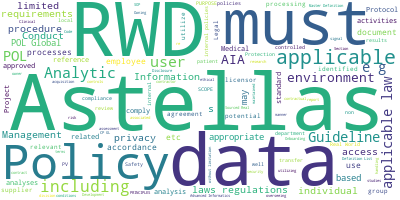

In [10]:
######################
# WORDCLOUD
######################
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(comp_docs[0])

# Visualize the word cloud
wordcloud.to_image()

In [11]:
######################
# PREP DATA
######################
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = comp_docs
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

['owning', 'division', 'advanced', 'informatics', 'analytics', 'owning', 'subdivision', 'advanced', 'informatics', 'analytics', 'owning', 'location', 'astellas', 'us', 'llc', 'status', 'effective', 'doc', 'title', 'externally', 'sourced', 'real', 'world', 'data', 'supersedes', 'pol', 'table', 'contents', 'purpose', 'ii']
[(0, 1), (1, 1), (2, 9), (3, 1), (4, 7), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 6), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 2), (17, 1), (18, 1), (19, 1), (20, 5), (21, 11), (22, 2), (23, 2), (24, 1), (25, 6), (26, 6), (27, 9), (28, 5), (29, 1)]


In [12]:
from pprint import pprint

# number of topics
num_topics = 2

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"aia" + 0.032*"data" + 0.020*"project" + 0.011*"review" + '
  '0.011*"business" + 0.011*"astellas" + 0.010*"team" + 0.008*"environment" + '
  '0.008*"request" + 0.007*"rwd"'),
 (1,
  '0.030*"data" + 0.029*"aia" + 0.013*"review" + 0.013*"astellas" + '
  '0.013*"project" + 0.009*"team" + 0.008*"business" + 0.007*"privacy" + '
  '0.007*"rwd" + 0.007*"environment"')]
